In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

# Ganti path sesuai dengan lokasi file di Google Drive
file_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/UAS/TMS_Data.xlsx'
# Baca sheet pertama
df = pd.read_excel(file_path)

# Cek 5 baris pertama
df.head()


,UserId,TaskHistoryId,ProjectId,ClientId,TypeName,TaskOverallState,PriorityName,TotalWorkingTimeInHour,NoOfStart,NoOfPause,NoOfFinish,DaysRequired,TotalWorkingDay
0,2,3533,8,5,Support,Pause,Medium,82.88,83,83,0,330,71
1,2,176,16,10,Support,Finish,Medium,3.62,11,9,10,328,14
2,2,3382,33,20,Data Migration,Finish,High,2.54,3,3,1,298,3
3,2,59,8,5,Support,Finish,High,115.22,217,219,3,289,131
4,2,5245,14,8,Support,Finish,Medium,0.68,2,2,2,215,4


In [6]:
#Drop kolom yang tidak relevan untuk estimasi effort
drop_cols = ['UserId', 'TaskHistoryId', 'ProjectId', 'ClientId']
df = df.drop(columns=drop_cols)

In [7]:
df.head()

,TypeName,TaskOverallState,PriorityName,TotalWorkingTimeInHour,NoOfStart,NoOfPause,NoOfFinish,DaysRequired,TotalWorkingDay
0,Support,Pause,Medium,82.88,83,83,0,330,71
1,Support,Finish,Medium,3.62,11,9,10,328,14
2,Data Migration,Finish,High,2.54,3,3,1,298,3
3,Support,Finish,High,115.22,217,219,3,289,131
4,Support,Finish,Medium,0.68,2,2,2,215,4


In [8]:
# 6. Cek missing values (jika ada)
print("\nMissing Values per Kolom:")
df.isnull().sum()


Missing Values per Kolom:


,0
TypeName,0
TaskOverallState,0
PriorityName,0
TotalWorkingTimeInHour,0
NoOfStart,0
NoOfPause,0
NoOfFinish,0
DaysRequired,0
TotalWorkingDay,0


In [9]:
df_copy_1 = df.copy()

In [10]:
#Konversi fitur kategorikal menjadi numerik (One Hot Encoding)
df_encoded = pd.get_dummies(df_copy_1, columns=['TypeName', 'TaskOverallState', 'PriorityName'], drop_first=True)

In [11]:
df_encoded = df_encoded.astype(int)

In [12]:
df_encoded.head()

,TotalWorkingTimeInHour,NoOfStart,NoOfPause,NoOfFinish,DaysRequired,TotalWorkingDay,TypeName_Bug Fixing,TypeName_Change Requirement,TypeName_Data Migration,TypeName_Deploy,...,TypeName_Document Writing,TypeName_Modification,TypeName_New Requirement,TypeName_Solution Preparation,TypeName_Support,TypeName_Testing,TaskOverallState_Pause,PriorityName_High,PriorityName_Low,PriorityName_Medium
0,82,83,83,0,330,71,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,3,11,9,10,328,14,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,3,3,1,298,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,115,217,219,3,289,131,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,2,2,2,215,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [13]:
#Tentukan variabel X dan Y
X = df_encoded.drop(columns=['TotalWorkingTimeInHour'])  # Fitur
y = df_encoded['TotalWorkingTimeInHour']

In [14]:
#Tampilkan bentuk akhir
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nContoh X:")
X.head()


Shape of X: (1999, 21)
Shape of y: (1999,)

Contoh X:


,NoOfStart,NoOfPause,NoOfFinish,DaysRequired,TotalWorkingDay,TypeName_Bug Fixing,TypeName_Change Requirement,TypeName_Data Migration,TypeName_Deploy,TypeName_Design,...,TypeName_Document Writing,TypeName_Modification,TypeName_New Requirement,TypeName_Solution Preparation,TypeName_Support,TypeName_Testing,TaskOverallState_Pause,PriorityName_High,PriorityName_Low,PriorityName_Medium
0,83,83,0,330,71,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,11,9,10,328,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,3,1,298,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,217,219,3,289,131,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2,2,2,215,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
#Import libraries tambahan
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



In [16]:
# Optional: XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

#Definisikan model-model regresi
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}


In [17]:

if xgb_available:
    models["XGBoost"] = XGBRegressor(random_state=42, verbosity=0)

# Setup Cross Validation
c_folds = 10
kf = KFold(n_splits=c_folds, shuffle=True, random_state=42)



In [18]:
#Evaluasi semua model
results = []

for name, model in models.items():
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    results.append({
        'Model': name,
        'MAE Mean': round(mae_scores.mean(), 3),
        'RMSE Mean': round(rmse_scores.mean(), 3),
        'R2 Mean': round(r2_scores.mean(), 3)
    })




In [19]:
#Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results)
print("\nHasil Evaluasi Model dengan {}-Fold Cross Validation:\n".format(c_folds))
print(results_df.sort_values(by='RMSE Mean'))


Hasil Evaluasi Model dengan 10-Fold Cross Validation:

               Model  MAE Mean  RMSE Mean  R2 Mean
3  Gradient Boosting     2.966      5.885    0.599
2      Random Forest     3.146      6.324    0.542
7            XGBoost     3.237      6.647    0.483
5      KNN Regressor     3.375      6.971    0.475
4           AdaBoost     4.456      7.411    0.366
6                SVR     3.267      7.938    0.328
0  Linear Regression     3.607      8.130    0.265
1      Decision Tree     3.796      8.225    0.135


label encoding

In [20]:
df['TypeName'].unique()

array(['Support', 'Data Migration', 'New Requirement', 'Bug Fixing',
       'Change Requirement', 'Modification', 'Analysis', 'Testing',
       'Design', 'Document Writing', 'Discussion of coding',
       'Solution Preparation', 'Deploy'], dtype=object)

In [21]:
label_mapping = {
    'Support': 0,
    'Data Migration': 1,
    'New Requirement': 2,
    'Bug Fixing': 3,
    'Change Requirement': 4,
    'Modification': 5,
    'Analysis': 6,
    'Testing': 7,
    'Design': 8,
    'Document Writing': 9,
    'Discussion of coding': 10,
    'Solution Preparation': 11,
    'Deploy': 12
}
df['TypeName_encoded'] = df['TypeName'].map(label_mapping)
df.drop(columns='TypeName', inplace=True)
df.rename(columns={'TypeName_encoded': 'TypeName'}, inplace=True)

In [22]:
df['TaskOverallState'].unique()

array(['Pause', 'Finish'], dtype=object)

In [23]:
state_mapping = {
    'Pause': 0,
    'Finish': 1
}

df['TaskOverallState_encoded'] = df['TaskOverallState'].map(state_mapping)
df.drop(columns='TaskOverallState', inplace=True)
df.rename(columns={'TaskOverallState_encoded': 'TaskOverallState'}, inplace=True)

In [24]:
df['PriorityName'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [25]:
priority_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Critical': 3
}

df['PriorityName_encoded'] = df['PriorityName'].map(priority_mapping)
df.drop(columns='PriorityName', inplace=True)
df.rename(columns={'PriorityName_encoded': 'PriorityName'}, inplace=True)

In [26]:
df.head()

,TotalWorkingTimeInHour,NoOfStart,NoOfPause,NoOfFinish,DaysRequired,TotalWorkingDay,TypeName,TaskOverallState,PriorityName
0,82.88,83,83,0,330,71,0,0,1
1,3.62,11,9,10,328,14,0,1,1
2,2.54,3,3,1,298,3,1,1,2
3,115.22,217,219,3,289,131,0,1,2
4,0.68,2,2,2,215,4,0,1,1


In [27]:
#Tentukan variabel X dan Y
X = df.drop(columns=['TotalWorkingTimeInHour'])  # Fitur
y = df['TotalWorkingTimeInHour']

In [28]:
#Evaluasi semua model
results = []

for name, model in models.items():
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    results.append({
        'Model': name,
        'MAE Mean': round(mae_scores.mean(), 3),
        'RMSE Mean': round(rmse_scores.mean(), 3),
        'R2 Mean': round(r2_scores.mean(), 3)
    })

In [29]:
#Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results)
print("\nHasil Evaluasi Model dengan {}-Fold Cross Validation:\n".format(c_folds))
print(results_df.sort_values(by='RMSE Mean'))


Hasil Evaluasi Model dengan 10-Fold Cross Validation:

               Model  MAE Mean  RMSE Mean  R2 Mean
3  Gradient Boosting     2.988      6.116    0.568
2      Random Forest     3.171      6.403    0.529
7            XGBoost     3.256      6.819    0.453
5      KNN Regressor     3.319      6.889    0.484
4           AdaBoost     4.458      7.352    0.377
6                SVR     3.278      7.948    0.324
0  Linear Regression     3.645      8.198    0.249
1      Decision Tree     3.956      8.789    0.039


PYCARET

hot encoder

In [ ]:
#Setup PyCaret untuk regresi
from pycaret.regression import *

regression_setup = setup(
    data=df_encoded,
    target='TotalWorkingTimeInHour',  # Kolom target
    train_size=0.8,                   # 80% untuk training
    session_id=42,
    fold=10                            # C-Fold Cross Validation
)

,Description,Value
0,Session id,42
1,Target,TotalWorkingTimeInHour
2,Target type,Regression
3,Original data shape,"(1999, 22)"
4,Transformed data shape,"(1999, 22)"
5,Transformed train set shape,"(1599, 22)"
6,Transformed test set shape,"(400, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Bandingkan semua model regresi
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.8622,29.0299,5.2867,0.6621,0.6573,0.6925,0.1440
rf,Random Forest Regressor,3.0554,33.1948,5.6535,0.5943,0.6877,0.7756,0.5990
xgboost,Extreme Gradient Boosting,3.1589,37.4759,5.9781,0.5702,0.7057,0.7800,0.0870
lightgbm,Light Gradient Boosting Machine,3.0598,34.4323,5.8024,0.5701,0.6866,0.7464,0.5000
et,Extra Trees Regressor,3.1592,36.0597,5.8919,0.5424,0.7231,0.8231,0.3790
knn,K Neighbors Regressor,3.3223,44.2861,6.4702,0.5402,0.7227,0.8059,0.0260
ada,AdaBoost Regressor,3.8280,38.5164,6.1592,0.5152,0.8737,1.2810,0.0890
huber,Huber Regressor,2.8472,65.6900,6.9119,0.4018,0.6339,0.6028,0.0740
br,Bayesian Ridge,3.4624,72.4152,7.5286,0.3141,0.7687,0.9718,0.0260
en,Elastic Net,3.5903,72.5246,7.5969,0.3096,0.8093,1.0057,0.0270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

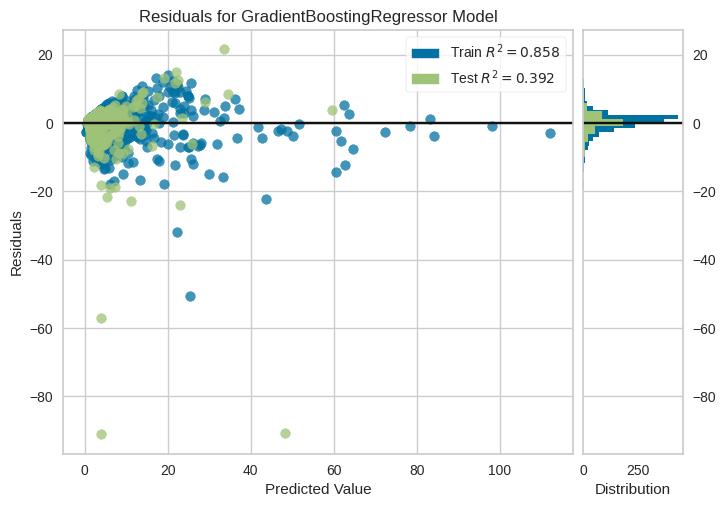

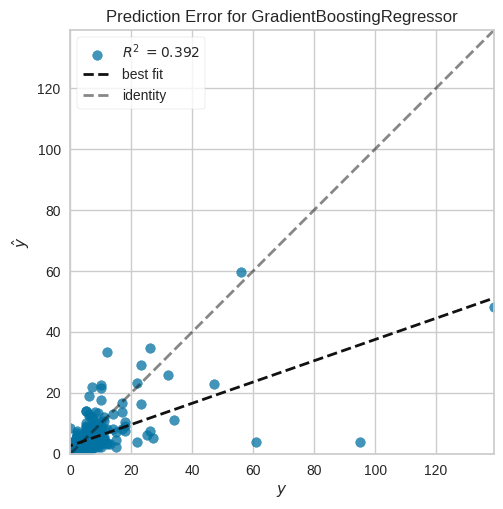

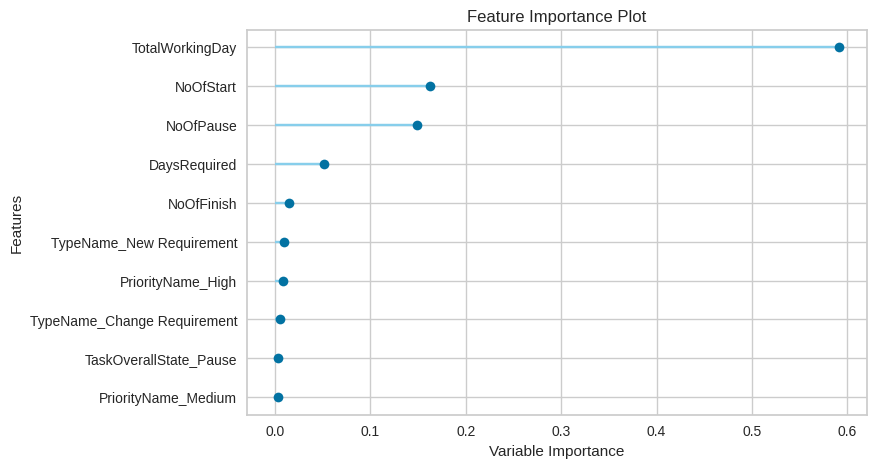

In [ ]:
#Plot hasil evaluasi model terbaik
plot_model(best_model, plot='residuals')  # Plot residual
plot_model(best_model, plot='error')      # Plot error distribution
plot_model(best_model, plot='feature')    # Feature importance

manual encoder

In [ ]:
#Setup PyCaret untuk regresi
from pycaret.regression import *

regression_setup = setup(
    data=df,
    target='TotalWorkingTimeInHour',  # Kolom target
    train_size=0.8,                   # 80% untuk training
    session_id=42,
    fold=10                            # C-Fold Cross Validation
)

,Description,Value
0,Session id,42
1,Target,TotalWorkingTimeInHour
2,Target type,Regression
3,Original data shape,"(1999, 9)"
4,Transformed data shape,"(1999, 9)"
5,Transformed train set shape,"(1599, 9)"
6,Transformed test set shape,"(400, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Bandingkan semua model regresi
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.8627,29.1389,5.2764,0.6615,0.5565,2.1173,0.1910
rf,Random Forest Regressor,3.0830,34.2246,5.7321,0.5921,0.5869,1.8284,0.3500
xgboost,Extreme Gradient Boosting,3.1402,36.5269,5.9213,0.5747,0.6017,1.7924,0.1400
ada,AdaBoost Regressor,3.6843,36.6298,6.0088,0.5616,0.7161,3.4338,0.0810
lightgbm,Light Gradient Boosting Machine,3.0631,34.9198,5.8309,0.5580,0.5791,1.8296,0.2130
et,Extra Trees Regressor,3.2251,37.8937,6.0510,0.5452,0.6149,1.6337,0.2750
knn,K Neighbors Regressor,3.2669,44.0699,6.4492,0.5428,0.6081,2.0345,0.0300
huber,Huber Regressor,2.8756,68.9579,7.0148,0.3736,0.5415,1.7373,0.1030
en,Elastic Net,3.5932,72.4798,7.5933,0.3079,0.6809,3.1654,0.0220
llar,Lasso Least Angle Regression,3.6064,72.6889,7.6154,0.3044,0.6823,3.1799,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

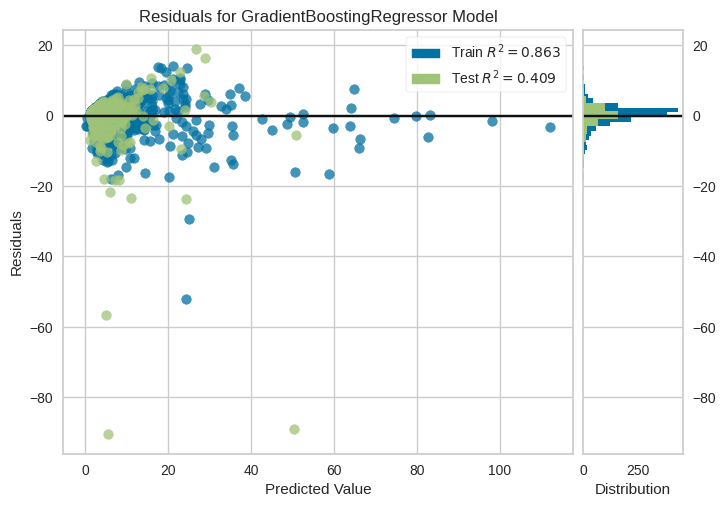

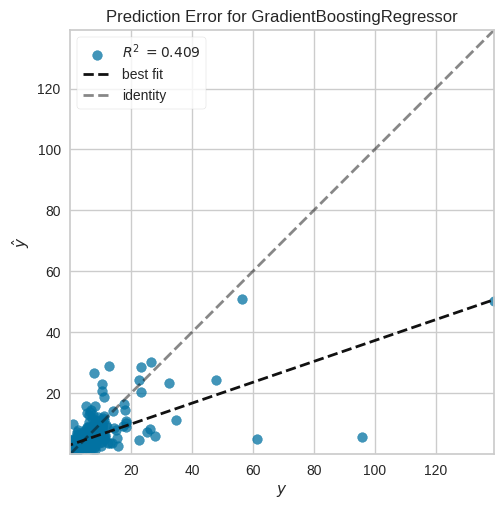

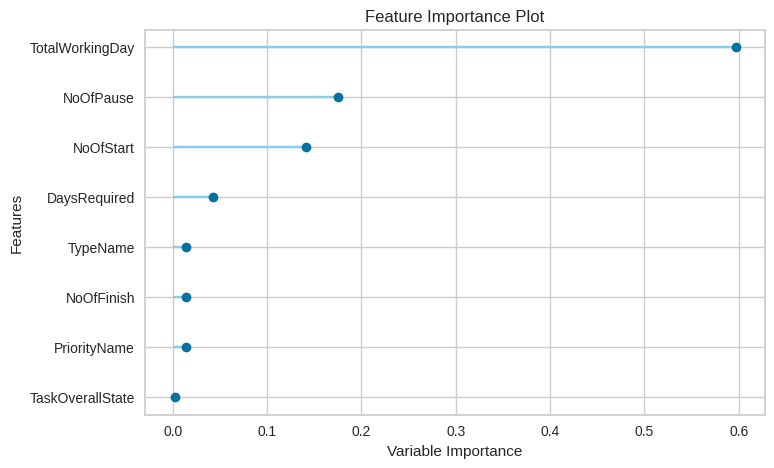

In [ ]:
#Plot hasil evaluasi model terbaik
plot_model(best_model, plot='residuals')  # Plot residual
plot_model(best_model, plot='error')      # Plot error distribution
plot_model(best_model, plot='feature')    # Feature importance